# GaussBernouilli prior

## Model

- $p(x) = \rho \mathcal{N}(x) + (1-\rho)\delta_0(x)$
- infer $x$ from noisy observation $r,v$ or $a=\frac{1}{v},b=\frac{r}{v}$
- $Z = \int dx\, p(x) e^{-\frac{1}{2} a x^2 + b x}$

## Posterior

In [1]:
import numpy as np
from tramp.priors import GaussBernouilliPrior
from tramp.experiments import run_experiments, qplot

def run_posterior(rho, r, v):
    prior = GaussBernouilliPrior(size=1, rho=rho)
    a, b = 1/v, r/v
    rx, vx = prior.compute_forward_posterior(a, b)
    return dict(a=a, b=b, rx=rx, vx=vx)

df = run_experiments(
    run_posterior, rho=0.5, v = [0.5, 2], r = np.linspace(-10,10,101)
)

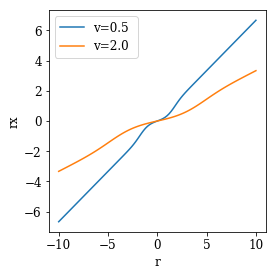

In [2]:
qplot(df, x="r", y="rx", color="v")

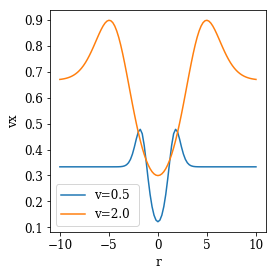

In [3]:
qplot(df, x="r", y="vx", color="v")

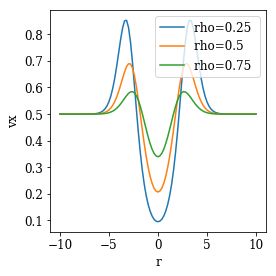

In [4]:
df = run_experiments(
    run_posterior, rho=[0.25, 0.5, 0.75], v = 1, r = np.linspace(-10,10,101)
)
qplot(df, x="r", y="vx", color="rho")

## Error function

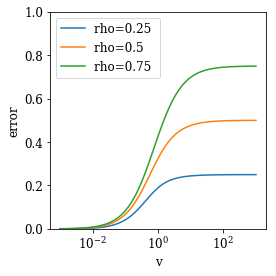

In [5]:
def run_error(rho, v):
    prior = GaussBernouilliPrior(size=1, rho=rho)
    a = 1/v
    error = prior.compute_forward_error(a)
    return dict(a=a, error=error)

df = run_experiments(
    run_error, rho=[0.25, 0.5, 0.75], v = 10**np.linspace(-3,3,101)
)
qplot(df, x="v", y="error", color="rho", xlog=True, ylim=(0,1))

## Numerical stability

Seems okay

In [6]:
# test initial condition a=b=0
for rho in [0.5, 0.3]:
    gb = GaussBernouilliPrior(rho=rho, size=1)
    print(gb)
    print(gb.compute_forward_posterior(ax=1e-15, bx=1e-15))
    print(gb.compute_forward_posterior(ax=0, bx=0))
    print(gb.compute_forward_posterior(ax=1e-15, bx=0))
    print(gb.compute_forward_error(ax=1e-15))
    print(gb.compute_forward_error(ax=0)) # slight error but okay
    print()

GaussBernouilliPrior(size=1,rho=0.5,mean=0,var=1)
(array([5.e-16]), 0.49999999999999933)
(array([0.]), 0.5)
(array([0.]), 0.4999999999999992)
0.49999999999999983
0.5000000000000001

GaussBernouilliPrior(size=1,rho=0.3,mean=0,var=1)
(array([3.e-16]), 0.2999999999999996)
(array([0.]), 0.30000000000000004)
(array([0.]), 0.2999999999999996)
0.3
0.30000000000000016

